In [1]:
#Ejercicio 1
import os
from IPython.core.pylabtools import import_pylab
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense
import tensorflow_datasets as tfds
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report 
import zipfile
from tensorflow.keras.models import load_model
from keras.preprocessing import image
import sklearn.metrics as metrics
from keras.utils.np_utils import to_categorical
from keras.layers.core import  Lambda , Dense, Flatten, Dropout
from keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split



#Ejercicio 2
import statsmodels.tsa as tsa
import statsmodels as sm
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error

2022-08-26 23:29:04.918062: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-26 23:29:04.918118: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/shared-libs/python3.9/py/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Ejercicio 1

### Análisis exploratorio y NN

In [2]:
train = pd.read_csv('./archivos/train.csv', encoding="ISO-8859-1")
test = pd.read_csv('./archivos/test.csv', encoding="ISO-8859-1")

In [3]:
X_train = (train.iloc[:,1:].values).astype('float32') # all pixel values
y_train = train.iloc[:,0].values.astype('int32') # only labels i.e targets digits
X_test = test.values.astype('float32')

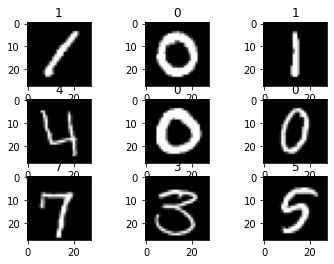

In [4]:
#Convert train datset to (num_images, img_rows, img_cols) format 
X_train = X_train.reshape(X_train.shape[0], 28, 28)

for i in range(0, 9):
    plt.subplot(330 + (i+1))
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.title(y_train[i]);

In [5]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_train.shape

(42000, 28, 28, 1)

In [6]:
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
X_test.shape

(28000, 28, 28, 1)

In [7]:
#centrar los datos en torno a la media cero y la varianza unitaria.
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)

def standardize(x): 
    return (x-mean_px)/std_px

In [8]:
y_train= to_categorical(y_train)
num_classes = y_train.shape[1]
num_classes

10

In [9]:
model= Sequential()
model.add(Lambda(standardize,input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
print("input shape ",model.input_shape)
print("output shape ",model.output_shape)

input shape  (None, 28, 28, 1)
output shape  (None, 10)
2022-08-26 23:29:19.634923: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-26 23:29:19.634968: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-26 23:29:19.634992: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (p-c3a6625f-ef6a-4d4b-9a25-c7dc0c8169d0): /proc/driver/nvidia/version does not exist
2022-08-26 23:29:19.635284: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
model.compile(optimizer=RMSprop(lr=0.001),
 loss='categorical_crossentropy',
 metrics=['accuracy'])

/shared-libs/python3.9/py/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [11]:
gen = image.ImageDataGenerator()
X = X_train
y = y_train
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=42)

In [12]:
history=model.fit(x=X_train,y=y_train,epochs=6,batch_size=16,validation_split=0.1,verbose=2)

Epoch 1/6
2022-08-26 23:29:20.103812: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 106686720 exceeds 10% of free system memory.
2127/2127 - 4s - loss: 0.4027 - accuracy: 0.8816 - val_loss: 0.3159 - val_accuracy: 0.9180 - 4s/epoch - 2ms/step
Epoch 2/6
2127/2127 - 4s - loss: 0.3166 - accuracy: 0.9121 - val_loss: 0.3129 - val_accuracy: 0.9212 - 4s/epoch - 2ms/step
Epoch 3/6
2127/2127 - 4s - loss: 0.3055 - accuracy: 0.9178 - val_loss: 0.3257 - val_accuracy: 0.9230 - 4s/epoch - 2ms/step
Epoch 4/6
2127/2127 - 4s - loss: 0.2981 - accuracy: 0.9186 - val_loss: 0.3125 - val_accuracy: 0.9212 - 4s/epoch - 2ms/step
Epoch 5/6
2127/2127 - 4s - loss: 0.2923 - accuracy: 0.9221 - val_loss: 0.3092 - val_accuracy: 0.9291 - 4s/epoch - 2ms/step
Epoch 6/6
2127/2127 - 4s - loss: 0.2876 - accuracy: 0.9230 - val_loss: 0.3379 - val_accuracy: 0.9180 - 4s/epoch - 2ms/step


In [36]:
ypred = model.predict(x_val,verbose=0)
y_prediction = []
for prediction in ypred:
  max_value = max(prediction)
  max_index = list(prediction).index(max_value)
  y_prediction.append(max_index)
y_prediction = np.array(y_prediction).astype('int64')
y_validation = []
for value in y_val:
  max_value = max(value)
  max_index = list(value).index(max_value)
  y_validation.append(max_index)
y_validation = np.array(y_validation).astype('int64')

In [38]:
accuracy = metrics.accuracy_score(y_validation, y_prediction)
accuracy

0.9147619047619048

In [37]:
result = confusion_matrix(y_validation, y_prediction)
result

array([[794,   0,   0,   0,   2,  13,   3,   0,   4,   0],
       [  0, 894,   2,   1,   0,   3,   1,   1,   7,   0],
       [  9,  15, 757,   5,   8,  14,   4,   6,  27,   1],
       [  2,   8,  25, 767,   0,  78,   0,   6,  44,   7],
       [  3,   4,   3,   1, 774,   7,   8,   1,  12,  26],
       [  7,   2,   5,   9,   2, 643,   6,   3,  23,   2],
       [ 10,   2,   6,   0,   4,  21, 732,   0,  10,   0],
       [  0,   6,  16,   6,   8,   6,   1, 816,   5,  29],
       [  3,  12,   3,   7,   4,  32,   5,   0, 766,   3],
       [  5,   6,   4,  10,  20,  12,   0,  23,  17, 741]])

### Deep Learning

In [13]:
data_dir = './archivos'
os.listdir(data_dir)

['sample_submission.csv', 'train.csv', 'test.csv', 'core.3191']

In [14]:
os.chdir(data_dir)

In [15]:
X_train = (train.iloc[:,1:].values).astype('float32') # all pixel values
y_train = train.iloc[:,0].values.astype('int32') # only labels i.e targets digits
X_test = test.values.astype('float32')

In [16]:
x_train = X_train.reshape(X_train.shape[0], 28, 28,1)
x_test = X_test.reshape(X_test.shape[0], 28, 28,1)
y_train = to_categorical(y_train)
num_classes = y_train.shape[1]



In [17]:
train_data_gen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_data_gen = ImageDataGenerator(rescale=1./255)


In [18]:
modelo = Sequential()
#Agregamos la primera convolución
modelo.add(Convolution2D(128,(3,3),strides=(1,1), input_shape=(64,64,3), activation='relu'))

In [19]:
modelo.add(MaxPooling2D(pool_size=(2,2)))

In [20]:
modelo.add(Convolution2D(64,(3,3),strides=(1,1),activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2,2)))

In [21]:
modelo.add(Flatten())

In [22]:
modelo.add(Dense(256,activation='relu'))

In [23]:
modelo.add(Dense(1, activation='sigmoid'))

In [24]:
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 12544)             0         
                                                                 
 dense_1 (Dense)             (None, 256)              

In [25]:
modelo.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')

In [26]:
epocas = 3
lote = 32

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.20, random_state=42)



In [27]:
datagen = ImageDataGenerator(zoom_range = 0.1,
                            height_shift_range = 0.1,
                            width_shift_range = 0.1,
                            rotation_range = 10)

In [33]:
H = modelo.fit(
  x=x_train,
  y=y_train,
  epochs=epocas
)

Epoch 1/3
2022-08-26 23:35:43.131969: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 105369600 exceeds 10% of free system memory.


ValueError: in user code:

    File "/shared-libs/python3.9/py/lib/python3.9/site-packages/keras/engine/training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "/shared-libs/python3.9/py/lib/python3.9/site-packages/keras/engine/training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/shared-libs/python3.9/py/lib/python3.9/site-packages/keras/engine/training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "/shared-libs/python3.9/py/lib/python3.9/site-packages/keras/engine/training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "/shared-libs/python3.9/py/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/shared-libs/python3.9/py/lib/python3.9/site-packages/keras/engine/input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 64, 64, 3), found shape=(32, 28, 28, 1)


In [ ]:
#y_predict = modelo.predict(x_val)
len(x_test)


28000

# Ejercicio 2

In [ ]:
dfImportaciones = pd.read_excel('/work/importaciones.xlsx', sheet_name='IMP-MES T', index_col=None, skiprows=6, nrows=257, usecols='B:AB')
dfImportaciones['Fecha'] = pd.to_datetime(dfImportaciones['Fecha'])
dfImportaciones['Anio'] = pd.DatetimeIndex(dfImportaciones['Fecha']).year
dfImportaciones['Mes'] = pd.DatetimeIndex(dfImportaciones['Fecha']).month
dfImportaciones.set_index('Fecha', inplace=True)
dfImportaciones = dfImportaciones[['Anio','Mes','Gasolina superior', 'Gasolina regular', 'Diesel']]
dfImportaciones.rename(columns = {'Gasolina superior':'Super', 'Gasolina regular':'Regular'}, inplace = True)
dfGeneralImportaciones = dfImportaciones
dfImportaciones.Super.head()

Fecha
2001-01-01    373963.96
2001-02-01    243091.07
2001-03-01    312084.38
2001-04-01    285054.89
2001-05-01    300913.67
Name: Super, dtype: float64

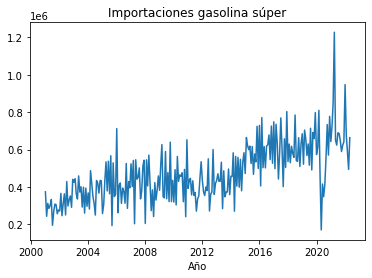

In [ ]:
super = dfImportaciones.Super
plt.plot(super)
plt.gca().set(title="Importaciones gasolina súper", xlabel="Año")
plt.show()

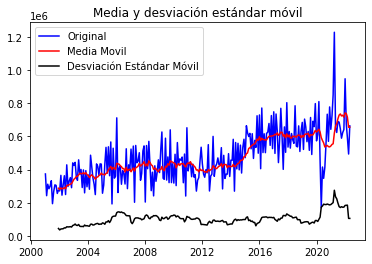

In [ ]:
# Se calcula la media móvil y la desviación estandar móvil de los últimos 12 meses.
mediaMovil = super.rolling(window=12).mean()
deMovil = super.rolling(window=12).std()
# Se grafican los resultados.
original = plt.plot(super, color="blue", label="Original")
media = plt.plot(mediaMovil, color='red', label = 'Media Movil')
ds = plt.plot(deMovil,color='black', label = 'Desviación Estándar Móvil')
plt.legend(loc = 'best')
plt.title('Media y desviación estándar móvil')
plt.show(block=False)

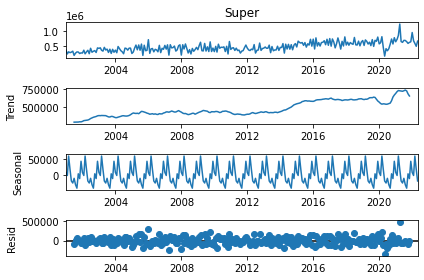

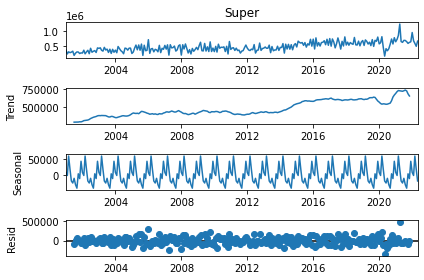

In [ ]:
descomposicion = seasonal_decompose(super)
descomposicion.plot()

In [ ]:
print('Resultados del Test de Dickey Fuller')
dfTest = adfuller(super, autolag='AIC')
salidaDf = pd.Series(dfTest[0:4], index=['Estadístico de prueba','p-value','# de retardos usados','# de observaciones usadas'])
for key,value in dfTest[4].items():
        salidaDf['Critical Value (%s)'%key] = value
print(salidaDf)

Resultados del Test de Dickey Fuller
Estadístico de prueba         -3.012763
p-value                        0.033720
# de retardos usados           3.000000
# de observaciones usadas    253.000000
Critical Value (1%)           -3.456464
Critical Value (5%)           -2.873033
Critical Value (10%)          -2.572895
dtype: float64


In [ ]:
print('Resultados del Test de Dickey Fuller para una diferenciación de la serie')
ts_super_diff = super.diff()
ts_super_diff.fillna(0,inplace=True)
dfTest = adfuller(ts_super_diff)
salidaDf = pd.Series(dfTest[0:4], index=['Estadístico de prueba','p-value','# de retardos usados','# de observaciones usadas'])
for key,value in dfTest[4].items():
        salidaDf['Critical Value (%s)'%key] = value
print(salidaDf)

Resultados del Test de Dickey Fuller para una diferenciación de la serie
Estadístico de prueba       -7.086386e+00
p-value                      4.527062e-10
# de retardos usados         1.400000e+01
# de observaciones usadas    2.420000e+02
Critical Value (1%)         -3.457664e+00
Critical Value (5%)         -2.873559e+00
Critical Value (10%)        -2.573175e+00
dtype: float64


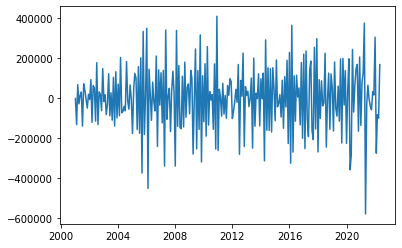

In [ ]:
plt.plot(ts_super_diff)

Como las redes neuronales trabajan mejor con datos normalizados, procedemos a normalizar.

In [ ]:
scaler = StandardScaler()
ts_super_diff=ts_super_diff.values.reshape(-1,1)
ts_super_scaled = scaler.fit_transform(ts_super_diff) 
ts_super_scaled[1:7]

array([[-0.80729261],
       [ 0.41506988],
       [-0.17219634],
       [ 0.0901042 ],
       [ 0.19067865],
       [-0.85177015]])

In [ ]:
entrenamiento = round(0.6*len(ts_super_scaled))
val_prueba = round(0.2*len(ts_super_scaled))
test = ts_super_scaled[(entrenamiento+val_prueba)-1:]
validation = ts_super_scaled[(entrenamiento):entrenamiento+val_prueba+1]
train = ts_super_scaled[0:entrenamiento]
train=np.insert(train,0,0)
train=np.reshape(train,(train.shape[0],1))
len(test)

53

In [ ]:
from operator import concat


def supervisada(serie,retrasos = 1):
    serie_x = []
    serie_y = []
    for i in range(len(serie)-retrasos):
        valor = serie[i:(i+retrasos),0]
        valor_sig = serie[i+retrasos,0]
        serie_x.append(valor)
        serie_y.append(valor_sig)
    return np.array(serie_x), np.array(serie_y)

x_train,y_train = supervisada(train)
x_val,y_val = supervisada(validation)
x_test,y_test = supervisada(test)

In [ ]:
x_train = np.reshape(x_train,(x_train.shape[0],1,1))
x_val = np.reshape(x_val, (x_val.shape[0],1,1))
x_test = np.reshape(x_test, (x_test.shape[0],1,1))
len(x_val)

51

In [ ]:
modelo1 = Sequential()
lote = 1
unidades =  1
paso = 1
caracteristicas = 1 #es univariada
modelo1.add(LSTM(lote, batch_input_shape=(lote,paso,caracteristicas),stateful=True))
modelo1.add(Dense(1))
modelo1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (1, 1)                    12        
                                                                 
 dense_3 (Dense)             (1, 1)                    2         
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


In [ ]:
modelo1.compile(loss='mean_squared_error',optimizer="rmsprop")

In [ ]:
epocas = 50
history= modelo1.fit(
    x = x_train,
    y = y_train,
    batch_size = lote,
    epochs = epocas,
    shuffle = False,
    validation_data = (x_val,y_val),
    verbose=1
)

Epoch 1/50
154/154 [==============================] - 2s 6ms/step - loss: 0.7746 - val_loss: 1.0738
Epoch 2/50
154/154 [==============================] - 0s 3ms/step - loss: 0.7562 - val_loss: 1.0463
Epoch 3/50
154/154 [==============================] - 0s 2ms/step - loss: 0.7385 - val_loss: 1.0195
Epoch 4/50
154/154 [==============================] - 0s 3ms/step - loss: 0.7212 - val_loss: 0.9936
Epoch 5/50
154/154 [==============================] - 0s 3ms/step - loss: 0.7044 - val_loss: 0.9684
Epoch 6/50
154/154 [==============================] - 0s 3ms/step - loss: 0.6880 - val_loss: 0.9442
Epoch 7/50
154/154 [==============================] - 0s 3ms/step - loss: 0.6723 - val_loss: 0.9209
Epoch 8/50
154/154 [==============================] - 0s 3ms/step - loss: 0.6573 - val_loss: 0.8986
Epoch 9/50
154/154 [==============================] - 0s 3ms/step - loss: 0.6429 - val_loss: 0.8772
Epoch 10/50
154/154 [==============================] - 0s 3ms/step - loss: 0.6293 - val_loss: 0.8567

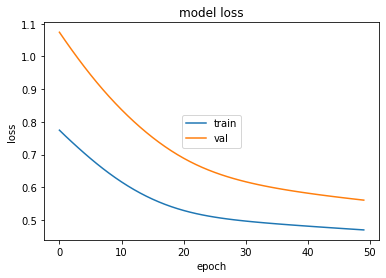

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='center')

In [ ]:
print("Pérdida en Entrenamiento")
modelo1.evaluate(
    x = x_train,
    y = y_train
)
print("Pérdida en Validación")
modelo1.evaluate(
    x = x_val,
    y = y_val
)
print("Pérdida en Prueba")
modelo1.evaluate(
    x = x_test,
    y = y_test
)

Pérdida en Entrenamiento
5/5 [==============================] - 0s 2ms/step - loss: 1.1527
Pérdida en Validación
2/2 [==============================] - 0s 4ms/step - loss: 1.8383
Pérdida en Prueba
2/2 [==============================] - 0s 4ms/step - loss: 1.5174


1.5174295902252197

In [ ]:
prediccion_val = []

def prediccion_fun(data,modelo, batch_size,scaler,dif=False,dif_cant=1, Series = np.NaN , n=1):
    prediccion = [0]* (len(data))
    i=0
    for X in data:
        X = np.reshape(X,(1,1,1))
        yhat = modelo1.predict(X, batch_size=batch_size,verbose=0)
        # invert scaling
        yhat = scaler.inverse_transform(yhat)
        if dif:
             # invert differencing
            yhat  = yhat + Series[(n+dif_cant*i)]
        # store
        prediccion[i]=yhat[0][0]
        i = i+1
    return prediccion
prediccion_val = prediccion_fun(x_val,modelo1, 1,scaler,dif=True,dif_cant=1, Series = super.values , n=entrenamiento)
prediccion_test = prediccion_fun(x_test,modelo1, 1,scaler,dif=True,dif_cant=1, Series = super.values , n=entrenamiento+val_prueba)


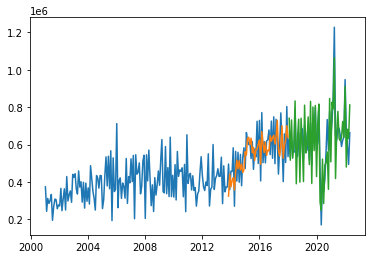

In [ ]:
df_val = pd.DataFrame(prediccion_val,index=super[(entrenamiento):entrenamiento+val_prueba].index)
df_test = pd.DataFrame(prediccion_test,index=super[entrenamiento+len(df_val):len(super)].index)


plt.plot(super)
plt.plot(df_val)
plt.plot(df_test)


### Modelo 2

In [ ]:
modelo2 = Sequential()
lote = 1
unidades =  3
paso = 1
caracteristicas = 1 #es univariada
modelo2.add(LSTM(lote, batch_input_shape=(lote,paso,caracteristicas),stateful=True))
modelo2.add(Dense(1))
modelo2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (1, 1)                    12        
                                                                 
 dense_4 (Dense)             (1, 1)                    2         
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


In [ ]:
modelo2.compile(loss='mean_squared_error', optimizer="rmsprop")

In [ ]:
epocas = 50
history= modelo2.fit(
    x = x_train,
    y = y_train,
    batch_size = lote,
    epochs = epocas,
    shuffle = False,
    validation_data = (x_val,y_val),
    verbose=1
)

Epoch 1/50
154/154 [==============================] - 3s 6ms/step - loss: 0.9042 - val_loss: 1.2620
Epoch 2/50
154/154 [==============================] - 0s 3ms/step - loss: 0.8267 - val_loss: 1.1623
Epoch 3/50
154/154 [==============================] - 0s 3ms/step - loss: 0.7811 - val_loss: 1.0906
Epoch 4/50
154/154 [==============================] - 0s 3ms/step - loss: 0.7456 - val_loss: 1.0300
Epoch 5/50
154/154 [==============================] - 0s 3ms/step - loss: 0.7140 - val_loss: 0.9747
Epoch 6/50
154/154 [==============================] - 0s 3ms/step - loss: 0.6842 - val_loss: 0.9232
Epoch 7/50
154/154 [==============================] - 0s 3ms/step - loss: 0.6559 - val_loss: 0.8751
Epoch 8/50
154/154 [==============================] - 0s 3ms/step - loss: 0.6293 - val_loss: 0.8308
Epoch 9/50
154/154 [==============================] - 0s 3ms/step - loss: 0.6048 - val_loss: 0.7906
Epoch 10/50
154/154 [==============================] - 0s 3ms/step - loss: 0.5827 - val_loss: 0.7547

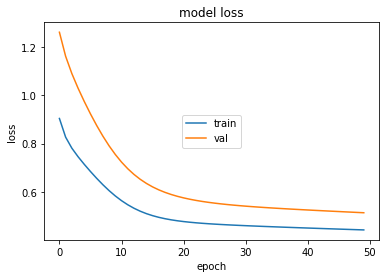

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='center')

In [ ]:
print("Pérdida en Entrenamiento")
modelo1.evaluate(
    x = x_train,
    y = y_train
)
print("Pérdida en Validación")
modelo1.evaluate(
    x = x_val,
    y = y_val
)
print("Pérdida en Prueba")
modelo1.evaluate(
    x = x_test,
    y = y_test
)

Pérdida en Entrenamiento
5/5 [==============================] - 0s 2ms/step - loss: 1.1898
Pérdida en Validación
2/2 [==============================] - 0s 4ms/step - loss: 1.8351
Pérdida en Prueba
2/2 [==============================] - 0s 4ms/step - loss: 1.5175


1.517458438873291

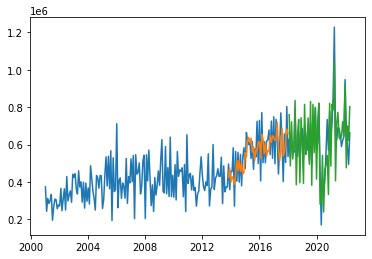

In [ ]:
prediccion_val = []

def prediccion_fun(data,modelo, batch_size,scaler,dif=False,dif_cant=1, Series = np.NaN , n=1):
    prediccion = [0]* (len(data))
    i=0
    for X in data:
        X = np.reshape(X,(1,1,1))
        yhat = modelo2.predict(X, batch_size=batch_size,verbose=0)
        # invert scaling
        yhat = scaler.inverse_transform(yhat)
        if dif:
             # invert differencing
            yhat  = yhat + Series[(n+dif_cant*i)]
        # store
        prediccion[i]=yhat[0][0]
        i = i+1
    return prediccion
prediccion_val = prediccion_fun(x_val,modelo2, 1,scaler,dif=True,dif_cant=1, Series = super.values , n=entrenamiento)
prediccion_test = prediccion_fun(x_test,modelo2, 1,scaler,dif=True,dif_cant=1, Series = super.values , n=entrenamiento+val_prueba)

df_val = pd.DataFrame(prediccion_val,index=super[(entrenamiento):entrenamiento+val_prueba].index)
df_test = pd.DataFrame(prediccion_test,index=super[entrenamiento+len(df_val):len(super)].index)


plt.plot(super)
plt.plot(df_val)
plt.plot(df_test)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c3a6625f-ef6a-4d4b-9a25-c7dc0c8169d0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>